### Recommender systems
Recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy or anything else depending on industries).
### Personalized
Personalization (broadly known as customization) consists of tailoring a service or a product to accommodate specific individuals, sometimes tied to groups or segments of individuals.

# Amazon Personalized 

## What Is Amazon Personalize?
- Amazon Personalize is a machine learning service that makes it easy for developers to add individualized recommendations to customers who use their applications.
- You can use Amazon Personalize in a variety of scenarios, such as giving users recommendations based on their preferences and behavior, personalized re-ranking of results, and personalizing content for emails and notifications
- You can build, train, and deploy a solution version (a trained Amazon Personalize recommendation model) with the AWS console or programmatically by using the AWS SDK:

    • Format input data and upload the data into an Amazon S3 bucket, or send real-time event data.
    
    • Select a training recipe (algorithm) to use on the data.
    
    • Train a solution version using the recipe.
    
    • Deploy the solution version.

With Amazon Personalize you can train a solution for different use cases. For example, user
personalization, items related to an item, and re-ranking of items. You choose a recipe based on your
use case and provide the input data.

## How It Works
- To make recommendations, Amazon Personalize uses a machine learning model that is trained with your data. The data used to train the model is stored in related datasets in a dataset group. Each model is trained by using a recipe that contains an algorithm for a specific use case. In Amazon Personalize, a trained model is known as a solution version.
- A solution version is deployed for use in a campaign. Users of your applications can receive recommendations through the campaign.
- A dataset can grow over time and your models can be retrained on the new data. The data can come from new metadata and the consumption of real-time user event data

Amazon Personalize consists of three related components:

    • Amazon Personalize – Use this to create, manage, and deploy solution versions.

    • Amazon Personalize Events – Use this to record user events to add to your training data.
    
    • Amazon Personalize Runtime – Use this to get recommendations from a campaign (deployed solution
version). 

## Amazon Personalize Workflow
The workflow for training, deploying, and getting recommendations from a campaign is:
    1. Create related datasets and a dataset group.
    2. Get training data.
        • Import historical data to the dataset group.
        • Record user events to the dataset group.
    3. Create a solution version (trained model) using a recipe.
    4. Evaluate the solution version using metrics.
    5. Create a campaign (deploy the solution version).
    6. Provide recommendations for users

## Datasets and Dataset Groups
- A dataset group contains related datasets. Three types of historical datasets are created by the customer (users, items, and interactions), and one type is created by Amazon Personalize for live-event interactions. A dataset group can contain only one of each kind of dataset.
- Historical data must be provided in a CSV file. Each dataset type has a unique schema that specifies the contents of the CSV file.


## User Events
- Amazon Personalize can consume real time user event data to be used for model training either alone or combined with historical data.


## Recipes and Solutions
- A trained model is known as a solution version. The model is trained using a recipe. 
- The recipes available in Amazon Personalize are made of an algorithm and the data processing steps that optimize a solution for a certain type of recommendation based on your input data.
- Amazon Personalize can automatically choose the most appropriate recipe based on its analysis of the training data. Alternatively, you can choose which recipe to train the model with. Each recipe has its own use case and you should choose recipe that best fits your needs.
- Each time you train a model, it is assigned a new solution version. Use the solution version ARN to identify which version of the solution you want to use for your campaign.

#### Predefined Recipes
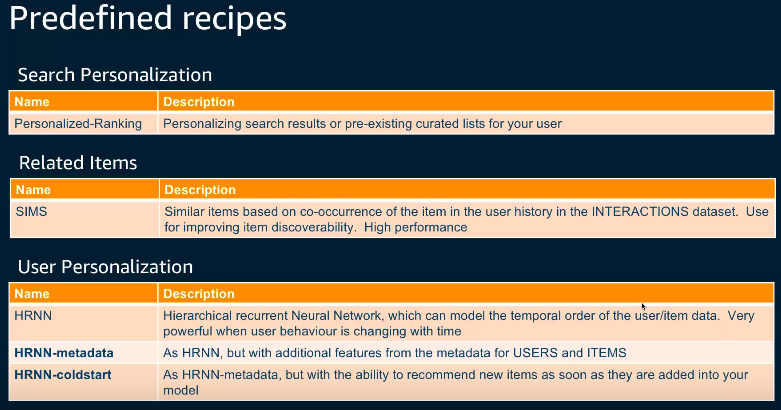
Amazon Personalize provides the following predefined recipes. They are listed by recipe type.
##### 1. USER_PERSONALIZATION Recipes:
    - HRNN Recipe:
        The Amazon Personalize hierarchical recurrent neural network (HRNN) recipe models changes in user behavior to provide recommendations during a session. A session is a set of user interactions within a given timeframe with a goal of finding a specific item to fill a need.
        
        The HRNN recipe has the following properties:
           • Name – aws-hrnn
           • Recipe Amazon Resource Name (ARN) – arn:aws:personalize:::recipe/aws-hrnn
           • Algorithm ARN – arn:aws:personalize:::algorithm/aws-hrnn
           • Feature transformation ARN – arn:aws:personalize:::feature-transformation/JSONpercentile-filtering
           • Recipe type – USER_PERSONALIZATION

         HRNN samples notebook: https://github.com/aws-samples/amazon-personalize-samples/blob/master/personalize_temporal_holdout/personalize_temporal_holdout.ipynb

    - HRNN-Metadata Recipe:
        
        The HRNN-Metadata recipe predicts the items that a user will interact with. It is similar to the         HRNN recipe, with additional features derived from contextual, user, and item metadata (from Interactions, Users, and Items datasets, respectively). HRNN-Metadata provides accuracy benefits over non-metadata models when high quality metadata is available. Using this recipe might require longer training times.
        
        The HRNN-Metadata recipe has the following properties:
            • Name – aws-hrnn-metadata
            • Recipe Amazon Resource Name (ARN) – arn:aws:personalize:::recipe/aws-hrnn-metadata
            • Algorithm ARN – arn:aws:personalize:::algorithm/aws-hrnn-metadata
            • Feature transformation ARN – arn:aws:personalize:::feature-transformation/featurize_metadata
            • Recipe type – USER_PERSONALIZATION
      
    - HRNN-Coldstart Recipe
         
         Use the HRNN-Coldstart recipe to predicts the items that a user will interact with when you frequently add new items and interactions and want to get recommendations for those items immediately. The HRNN-Coldstart recipe is similar to the HRNN-Metadata (p. 56) recipe, but it allows you to get recommendations for new items.
         
         In addition, you can use the HRNN-Coldstart recipe when you want to exclude from training items that have a long list of interactions either because of a recent popularity trend or because the interactions might be highly unusual and introduce noise in training. With HRNN-Coldstart, you can filter out less relevant items to create a subset for training.
         
         The HRNN-Coldstart recipe has the following properties:
            • Name – aws-hrnn-coldstart
            • Recipe Amazon Resource Name (ARN) – arn:aws:personalize:::recipe/aws-hrnncoldstart
            • Algorithm ARN – arn:aws:personalize:::algorithm/aws-hrnn-coldstart
            • Feature transformation ARN – arn:aws:personalize:::feature-transformation/featurize_coldstart
            • Recipe type – USER_PERSONALIZATION
         Sample notebook: https://github.com/aws-samples/amazon-personalize-samples/blob/master/personalize_temporal_holdout/personalize_coldstart_demo.ipynb
##### 2. Personalized-Ranking Recipe
   - The Personalized-Ranking recipe generates personalized rankings. A personalized ranking is a list of recommended items that are re-ranked for a specific user. 
   
   This recipe has the following properties:
        
        • Name – aws-personalized-ranking
        • Recipe Amazon Resource Name (ARN) – arn:aws:personalize:::recipe/aws-personalizedranking
        • Algorithm ARN – arn:aws:personalize:::algorithm/aws-personalized-ranking
        • Feature transformation ARN – arn:aws:personalize:::feature-transformation/JSONpercentile-filtering
        • Recipe type – PERSONALIZED_RANKING

##### 3. SIMS Recipe
    The Item-to-item similarities (SIMS) recipe is based on the concept of collaborative filtering. A SIMS model leverages user-item interaction data to recommend items similar to a given item. In the absence of sufficient user behavior data for an item, this recipe recommends popular items.
    
    This predefined recipe has the following properties:
    
        • Name – aws-sims
        • Recipe Amazon Resource Name (ARN) – arn:aws:personalize:::recipe/aws-sims
        • Algorithm ARN – arn:aws:personalize:::algorithm/aws-sims
        • Feature transformation ARN – arn:aws:personalize:::feature-transformation/sims
        • Recipe type – RELATED_ITEMS

### Algorithm Hyperparameters:

1. hidden_dimension: 
    - The number of hidden variables used in the model. Hidden variables recreate users' purchase history and item statistics to generate ranking scores.
    - Specify a greater number of hidden dimensions when your Interactions dataset includes more complicated patterns.
    - Using more hidden dimensions requires a larger dataset and more time to process.
    - Default value: 43

2. bptt 
    - Determines whether to use the back-propagation through time technique. 
    - Back-propagation through time is a technique that updates weights in recurrent neural network-based algorithms. 
    - Use bptt for long-term credits to connect delayed rewards to early events. . For example, a delayed reward can be a purchase made after several clicks
    - Default value: 32

3. recency_mask:
    - Determines whether the model should consider the latest popularity trends in the Interactions dataset. 
    - Latest popularity trends might include sudden changes in the underlying patterns of interaction events.
    

4. min_user_history_length_percentile:
    - The minimum percentile of user history lengths to include in model training.
    - Users with a short history often show patterns based on item popularity instead of the user's personal needs or wants.
    - Removing them can train models with more focus on underlying patterns in your data.

5. max_user_history_length_percentile:
    - The maximum percentile of user history lengths to include in model training.
    - Use max_user_history_length_percentile to exclude a percentage of users with long history lengths because data for these users tend to contain noise. For example, a robot might have a long list of automated interactions.

## Metrics
- After you have created your solution version, you evaluate the metrics that were created during training.The metrics give an indication of the solution version's performance.
- You can call the GetSolutionMetrics API. Typically, you train your model with multiple recipes and use the recipe that results in the metrics that show the best performance. After you have created a solution version based on your chosen recipe, the solution version is ready for deployment as a campaign.

## Campaigns
- A deployed solution version is known as a campaign. A campaign allows Amazon Personalize to make recommendations for your users.
- To deploy a solution version, you create a campaign in the console or by calling the CreateCampaign API.

## Recommendations
- After you create a campaign, you are able to get two different types of recommendations, depending on the recipe type that was used to train the model.
- For user-personalization and related-items recipes, the GetRecommendations API returns a list of recommended items.

## Getting Started (AWS SDK for Python) 
Prerequisites:
- The following steps are prerequisites for the getting started exercises.
    - Create an AWS account and an AWS Identity and Access Management user, as specified in Sign Up for
AWS.
    - Ensure the IAM user that you are using has the Required Permissions.
    - Create an AWS Identity and Access Management (IAM) service role, as specified in Creating an IAM
Role. Use the role ARN when you upload the movie training data.
    - Prepare your training data and upload the data to your Amazon S3 bucket, as specified in Create the
Training Data. Use the name of the Amazon S3 bucket when you upload the movie training
data.

### Step 1: Verify Your Python Environment

In [1]:
import boto3
personalize = boto3.client('personalize', region_name="ap-southeast-1")
response = personalize.list_recipes()
for recipe in response['recipes']:
     print(recipe)

### Step 2: Import Training Data

 Add a schema. The schema allows Amazon Personalize to parse the training dataset.
    1. Define the Avro format schema that you want to use.
    2. Save the schema in a JSON file in the default Python folder.
    3. Create the schema using the following code.
    4. Amazon Personalize returns the ARN of the new schema. Store it for later use.

In [ ]:
import boto3
personalize = boto3.client('personalize')
with open('schema.json') as f:
     createSchemaResponse = personalize.create_schema(name = 'YourSchema', schema = f.read())
schema_arn = createSchemaResponse['schemaArn']
print('Schema ARN:', schema_arn )

Import Your Data Using the AWS Python SDK
1. Create a dataset group using the CreateDatasetGroup API.

In [ ]:
import boto3
personalize = boto3.client('personalize')
response = personalize.create_dataset_group(name = 'YourDatasetGroup')
dsg_arn = response['datasetGroupArn']
description = personalize.describe_dataset_group(datasetGroupArn = dsg_arn)['datasetGroup']
print('Name: ', description['name'])
print('ARN: ', description['datasetGroupArn']

The response from the DescribeDatasetGroup API returns the datasetGroupArn and the
status of the operation.

*Note: 
You must wait until the status shows as ACTIVE before you can proceed to the next step.

2. Create a dataset using the CreateDataset API. Specify the datasetGroupArn returned in the previous step. Use the schemaArn created earlier

In [ ]:
import boto3
personalize = boto3.client('personalize')
response = personalize.create_dataset(name = 'YourDataset', 
                                      schemaArn = 'schema_arn', 
                                      datasetGroupArn = 'dataset_group_arn',
                                      datasetType = 'Interactions')
print ('Dataset Arn: ', response['datasetArn'])

3. To add data to your dataset, create and run a dataset import job using the CreateDatasetImportJob API. Specify the datasetGroupArn and set the dataLocation to the S3 bucket where you stored the training data.

Note:
    - For the roleArn, see Creating an IAM Role. The roleArn parameter specifies the AWS Identity and Access Management (IAM) role that gives Amazon Personalize permissions to access your S3 bucket.

In [ ]:
import boto3
personalize = boto3.client('personalize')
response = personalize.create_dataset_import_job(jobName = 'YourImportJob',
                                                 datasetArn = 'dataset_arn',
                                                 dataSource = {'dataLocation':'s3://bucket/file.csv'},
                                                 roleArn = 'role_arn')
dsij_arn = response['datasetImportJobArn']
print ('Dataset Import Job arn: ', dsij_arn)
description = personalize.describe_dataset_import_job( datasetImportJobArn = dsij_arn)['datasetImportJob']
print('Name: ', description['jobName'])
print('ARN: ', description['datasetImportJobArn'])
print('Status: ', description['status'])

Note:
- You must wait until the status changes to ACTIVE before you can use the data to train a model.

Important:
- Imports in Amazon Personalize are a full refresh of the data. You can't add incremental updates. If you need to update your data, import the complete updated file.

### Step 3: Create a Solution

In [ ]:
import boto3
personalize = boto3.client('personalize')
print ('Creating solution')
response = personalize.create_solution(name = "SolutionName", 
                                       datasetGroupArn = "Dataset group arn",
                                       performAutoML = True)
# Get the solution ARN.
solution_arn = response['solutionArn']
print('Solution ARN: ', solution_arn)
# Use the solution ARN to get the solution status.
solution_description = personalize.describe_solution(solutionArn = solution_arn)['solution']
print('Solution status: ', solution_description['status'])
# Use the solution ARN to create a solution version.
print ('Creating solution version')
response = personalize.create_solution_version(solutionArn = solution_arn)
solution_version_arn = response['solutionVersionArn']
print('Solution version ARN: ', solution_version_arn)
# Use the solution version ARN to get the solution version status.
solution_version_description = personalize.describe_solution_version(solutionVersionArn = solution_version_arn)['solutionVersion']
print('Solution version status: ', solution_version_description['status'])

#### Evaluating a Solution Version

##### Metrics 
- You retrieve the metrics for a specific solution version by calling the GetSolutionMetrics operation.

Retrieve metrics using the AWS Python SDK

1. Use the following code to retrieve metrics.

In [ ]:
import boto3
personalize = boto3.client('personalize')
response = personalize.get_solution_metrics(
 solutionVersionArn = 'solution version arn')
print(response['metrics'])

For each metric, higher numbers are better.
- coverage
    - The proportion of unique recommended items from all queries out of the total number of unique items in the training data (includes both the Items and Interactions datasets).
- mean_reciprocal_rank_at_25
    - The mean of the reciprocal ranks of the first relevant recommendation out of the top 25 recommendations over all queries. This metric is appropriate if you're interested in the single highest ranked recommendation.
- normalized_discounted_cumulative_gain_at_K
    - Discounted gain assumes that recommendations lower on a list of recommendations are less relevant than higher recommendations. Therefore, each recommendation is discounted (given a lower weight) by a factor dependent on its position. To produce the cumulative discounted gain (DCG) at K, each relevant discounted recommendation in the top K recommendations is summed together. The normalized discounted cumulative gain (NDCG) is the DCG divided by the ideal DCG such that NDCG is between 0 - 1. (The ideal DCG is where the top K recommendations are sorted by relevance.) Amazon Personalize uses a weighting factor of 1/log(1 + position), where the top of the list is position 1. This metric rewards relevant items that appear near the top of the list, because the top of a list usually draws more attention.
- precision_at_K
    - The number of relevant recommendations out of the top K recommendations divided by K.
    - This metric rewards precise recommendation of the relevant items.

### Step 4: Create a Campaign
After you train and evaluate your solution version, you can deploy it using a campaign. A campaign is an
endpoint used to host a solution version and make recommendations to users.
To create a campaign with the SDK, call the CreateCampaign API and pass the following:

    • A name for the campaign.
    • The Amazon Resource Name (ARN) of the solution version to deploy.
    • The minimum provisioned transactions per second (minProvisionedTPS) that Amazon Personalize will support.
    
Create a campaign using the AWS Python SDK
1. Create a solution version to deploy. 
2. Use the following code to create a campaign

In [ ]:
import boto3
personalize = boto3.client('personalize')
response = personalize.create_campaign(
 name = 'campaign name',
 solutionVersionArn = 'solution version arn',
 minProvisionedTPS = 10)
arn = response['campaignArn']
description = personalize.describe_campaign(campaignArn = arn)['campaign']
print('Name: ', description['name'])
print('ARN: ', description['campaignArn'])

The campaign isn't ready for use until its status is active. To get the current status, call
DescribeCampaign and check that the status field is ACTIVE.

### Step 5: Get Recommendations
After you create a campaign, you can use it to get recommendations.
- To get recommendations, call the GetRecommendations API. Supply either the user ID or item
ID, dependent on the recipe type used to create the solution the campaign is based on.

Note:

   - The solution backing the campaign must have been created using a recipe of type USER_PERSONALIZATION or RELATED_ITEMS. For more information, see Using Predefined Recipes.

Get recommendations using the AWS Python SDK:

   - Use the following code to get a recommendation. Change the value of userId to a user ID that is in the data you used to train the solution. A list of recommended items for the user is displayed

In [ ]:
import boto3
personalizeRt = boto3.client('personalize-runtime')
response = personalizeRt.get_recommendations(campaignArn = "Campaign ARN", userId = 'User ID')
print("Recommended items")
for item in response['itemList']:
    print(item['itemId'])

Get Personalized Rankings:

   - A personalized ranking is a list of recommended items that are re-ranked for a specific user. To get personalized rankings, call the GetPersonalizedRanking API. 
Note:

   - The solution backing the campaign must have been created using a recipe of type PERSONALIZED_RANKING. For more information, see Using Predefined Recipes.
   
Change the value of userId and inputList to a user ID and list of item IDs that are in the data you used to train the solution. A list of ranked recommendations is displayed. The first item in the list is considered by Amazon Personalize to be of most interest to the user.

In [ ]:
import boto3
personalizeRt = boto3.client('personalize-runtime')
response = personalizeRt.get_personalized_ranking(campaignArn = "Campaign arn", userId = 'UserID', inputList = ['ItemID1','ItemID2'])
print("Personalized Ranking")
for item in response['personalizedRanking']:
    print(item['itemId'])

Getting Batch Recommendations (AWS Python SDK):

The operation reads an input JSON file from an Amazon S3 bucket and places an output JSON file (input-file-name.out) in an Amazon S3 bucket.
The first item in the response file is considered by Amazon Personalize to be of most interest to the user.

In [ ]:
import boto3
personalize_rec = boto3.client(service_name='personalize')
personalize_rec.create_batch_inference_job (solutionVersionArn = "Solution version ARN",
                                            jobName = "Batch job name",
                                            roleArn = "IAM role ARN",
                                            jobInput =  {"s3DataSource": {"path": S3 input path}},
                                            jobOutput = {"s3DataDestination": {"path":S3 output path}}
                                            )

Examples:
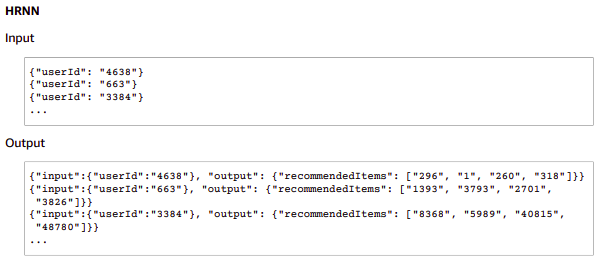